In [3416]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from decimal import Decimal
np.random.seed(45)

In [3417]:
df = pd.DataFrame(columns=['Epoch', 'Inputs', 'Desired Output Y',"Inicial wights","Actual output","Error","Final weights"])
df

,Epoch,Inputs,Desired Output Y,Inicial wights,Actual output,Error,Final weights


In [3418]:
learn_rate=0.1
Umbral=0.2

In [3419]:
pesos=2 * np.random.random((2,1)) - 1
#pesos[0]=Decimal(0.3)
#pesos[1]=Decimal(-0.1)
pesos

array([[0.97802303],
       [0.09908945]])

In [3420]:
entradas=np.array([[0,0],[0,1],[1,0],[1,1]])
salidas=np.array([[0],[0],[0],[1]])

In [3421]:
def funcionActivacion(S,Umbral):
    if S>=Umbral:
        return 1
    else:
        return 0
 

In [3422]:
def pintamos(i):
    plt.plot([0,0,1],[0,1,0],'o', color='blue');
    plt.plot([1],[1],'o', color='red');
    pendiente=0
    OrdenadaOrigen=0
    if pesos[1]!=0:
        pendiente=-(pesos[0]/pesos[1])
        OrdenadaOrigen=Umbral/pesos[1]
    else:
        print("efeffefeef")
    
    plt.plot([-2,2],[pendiente*-2 + OrdenadaOrigen,pendiente*2 + OrdenadaOrigen], color='green')
    axes = plt.gca()
    axes.set_xlim([-0.1,1.1])
    axes.set_ylim([-0.1,1.1])
    plt.title("Epoch: " +str (i+1))
    plt.show()

In [3423]:
def entrenar(entradas,salidas,epoch):
    global pesos
    ErroresEpoch=[]
    for i in range(epoch):
        errorM=0.0
        for x in range(entradas.shape[0]):
            S=np.dot(entradas[x],pesos)
            y=funcionActivacion(S[0],Umbral)
            error=salidas[x]-y
            errorM+=abs(error[0])
            pesosI=pesos.copy()
            pesos=pesos+np.array([learn_rate*entradas[x]*error]).T
            df.loc[df.shape[0]]=i+1,str(entradas[x]),salidas[x],np.round(pesosI,decimals=4),y,error,np.round(pesos.copy(),decimals=4)
        #pesos+=learn_rate*np.dot(entradas.T,error)
        errorM/=entradas.shape[0]
        ErroresEpoch.append(errorM)
        pintamos(i)    
        if errorM==0:
            return ErroresEpoch
    return ErroresEpoch


In [3424]:
def clasificacion(entradas):
    S=np.dot(entradas,pesos)
    print(funcionActivacion(S[0],Umbral))

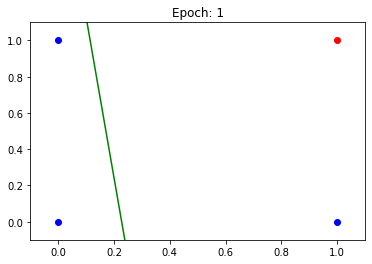

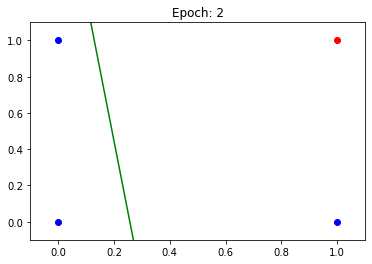

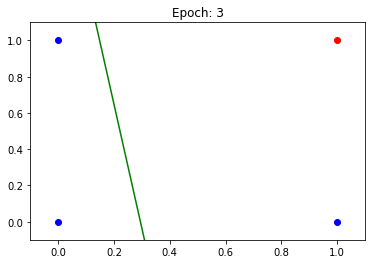

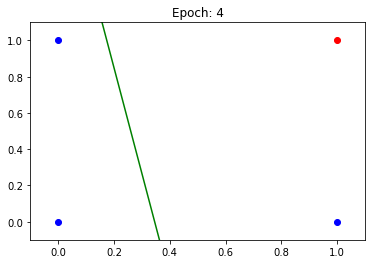

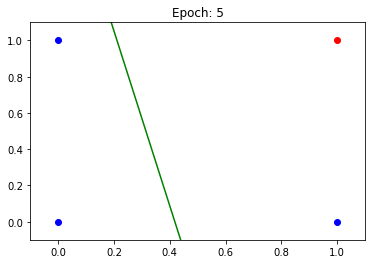

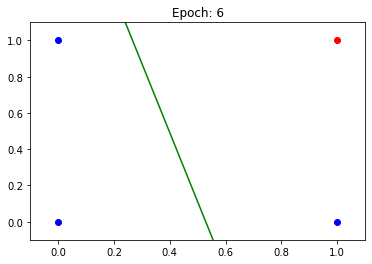

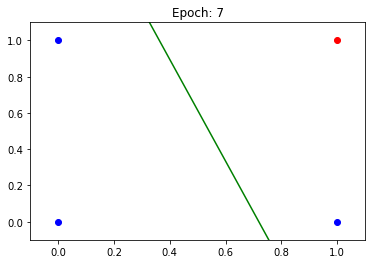

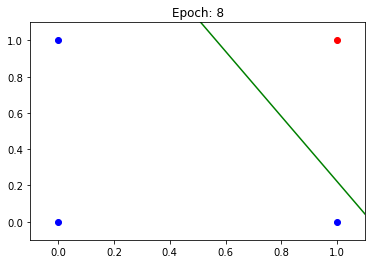

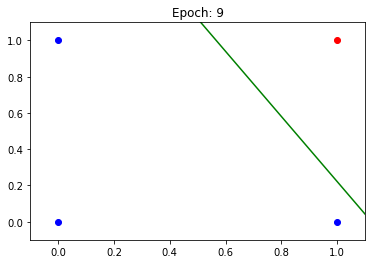

array([[0.17802303],
       [0.09908945]])

In [3425]:
periodo=10
ErroresEpoch=entrenar(entradas,salidas,periodo)
pesos


In [3426]:
df=df.set_index(["Epoch","Inputs"])
df.sort_index(inplace=True)
df

Desired Output Y       Inicial wights Actual output Error  \
Epoch Inputs                                                             
1     [0 0]               [0]  [[0.978], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.978], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.978], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.878], [0.0991]]             1   [0]   
2     [0 0]               [0]  [[0.878], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.878], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.878], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.778], [0.0991]]             1   [0]   
3     [0 0]               [0]  [[0.778], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.778], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.778], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.678], [0.0991]]             1   [0]   
4     [0 0]               [0]  [[0.678], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.678], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.678], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.578], [0.0991]]             1   [0]   
5     [0 0]               [0]  [[0.578], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.578], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.578], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.478], [0.0991]]             1   [0]   
6     [0 0]               [0]  [[0.478], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.478], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.478], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.378], [0.0991]]             1   [0]   
7     [0 0]               [0]  [[0.378], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.378], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.378], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.278], [0.0991]]             1   [0]   
8     [0 0]               [0]  [[0.278], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.278], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.278], [0.0991]]             1  [-1]   
      [1 1]               [1]  [[0.178], [0.0991]]             1   [0]   
9     [0 0]               [0]  [[0.178], [0.0991]]             0   [0]   
      [0 1]               [0]  [[0.178], [0.0991]]             0   [0]   
      [1 0]               [0]  [[0.178], [0.0991]]             0   [0]   
      [1 1]               [1]  [[0.178], [0.0991]]             1   [0]   

                    Final weights  
Epoch Inputs                       
1     [0 0]   [[0.978], [0.0991]]  
      [0 1]   [[0.978], [0.0991]]  
      [1 0]   [[0.878], [0.0991]]  
      [1 1]   [[0.878], [0.0991]]  
2     [0 0]   [[0.878], [0.0991]]  
      [0 1]   [[0.878], [0.0991]]  
      [1 0]   [[0.778], [0.0991]]  
      [1 1]   [[0.778], [0.0991]]  
3     [0 0]   [[0.778], [0.0991]]  
      [0 1]   [[0.778], [0.0991]]  
      [1 0]   [[0.678], [0.0991]]  
      [1 1]   [[0.678], [0.0991]]  
4     [0 0]   [[0.678], [0.0991]]  
      [0 1]   [[0.678], [0.0991]]  
      [1 0]   [[0.578], [0.0991]]  
      [1 1]   [[0.578], [0.0991]]  
5     [0 0]   [[0.578], [0.0991]]  
      [0 1]   [[0.578], [0.0991]]  
      [1 0]   [[0.478], [0.0991]]  
      [1 1]   [[0.478], [0.0991]]  
6     [0 0]   [[0.478], [0.0991]]  
      [0 1]   [[0.478], [0.0991]]  
      [1 0]   [[0.378], [0.0991]]  
      [1 1]   [[0.378], [0.0991]]  
7     [0 0]   [[0.378], [0.0991]]  
      [0 1]   [[0.378], [0.0991]]  
      [1 0]   [[0.278], [0.0991]]  
      [1 1]   [[0.278], [0.0991]]  
8     [0 0]   [[0.278], [0.0991]]  
      [0 1]   [[0.278], [0.0991]]  
      [1 0]   [[0.178], [0.0991]]  
      [1 1] 

ValueError: x and y must have same first dimension, but have shapes (10,) and (9,)

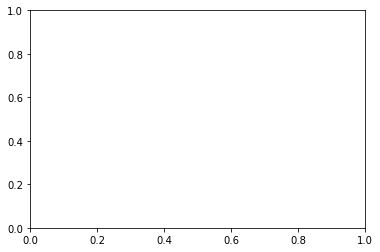

In [3427]:

plt.plot(np.arange(periodo),ErroresEpoch)
axes = plt.gca()
axes.set_ylim([0,1])
plt.show()
ErroresEpoch

In [ ]:
clasificacion(np.array([0,0]))
clasificacion(np.array([0,1]))
clasificacion(np.array([1,0]))
clasificacion(np.array([1,1]))